In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from sklearn.manifold import TSNE
#import seaborn as sns
from itertools import product
import math

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import Regression
from codes.kernels import spectrum_kernel
from codes.kernels_pairwise import spectrum_kernel_pw, spectrum_kernel_pw, mixed_spectrum_kernel_pw, WD_kernel_pw, WD_shift_kernel_pw

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

### Read saved file

In [35]:
import pickle

with open('dotproduct.pickle', 'rb') as handle:
    agent, kernel_matrix, X_embedded, all_data = pickle.load(handle)

### Plot arm with sorted prediction (2D)

In [36]:
sorted_idx = np.asarray(sorted(range(len(agent.mu + agent.sigma)), key=lambda k: (agent.mu + agent.sigma)[k]))

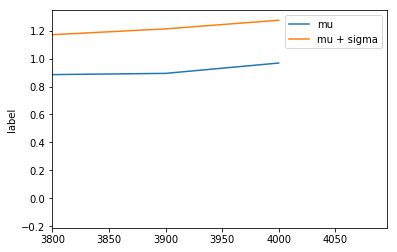

In [37]:
plt.plot(range(len(agent.mu))[::100], agent.mu[sorted_idx][::100], label = 'mu')
plt.plot(range(len(agent.mu))[::100], (agent.mu + agent.sigma)[sorted_idx][::100], label = 'mu + sigma')
plt.ylabel('label')
plt.xlim([3800,4096])
plt.legend()

### Plot kernel matrix 

In [38]:
new_kernel_matrix = kernel_matrix[113:, 113:]
sorted_new_kernel_matrix = new_kernel_matrix[sorted_idx, :][:, sorted_idx]

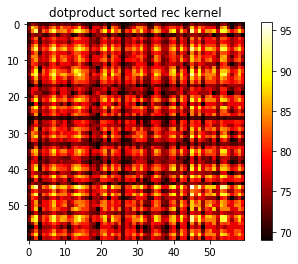

In [40]:
#plt.imshow(kernel_matrix, cmap = 'hot', interpolation='nearest')
plt.imshow(sorted_new_kernel_matrix[-60:,-60:], cmap = 'hot')
plt.colorbar()
plt.title('dotproduct sorted rec kernel')
plt.savefig('dotproduct_sorted_rec_kernel.png')

### Plot similar arms with prediction (3D)

In [7]:
similar_seqs = []

for i, idx_i in enumerate(X_embedded[113:]):
    for j, idx_j in enumerate(X_embedded[:113]):
        if np.linalg.norm(X_embedded[i]- X_embedded[j]) ** 2 <= 0.05:
            similar_seqs.append(i)
            break
            
len_sim = len(similar_seqs)
len_sim

853

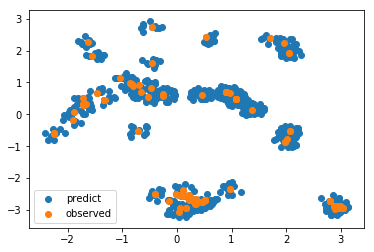

In [8]:
similar_seqs = np.asarray(similar_seqs)
plt.scatter(X_embedded[similar_seqs, 0], X_embedded[similar_seqs,1], label = 'predict')
plt.scatter(X_embedded[:113,0], X_embedded[:113,1], label = 'observed')
plt.legend()

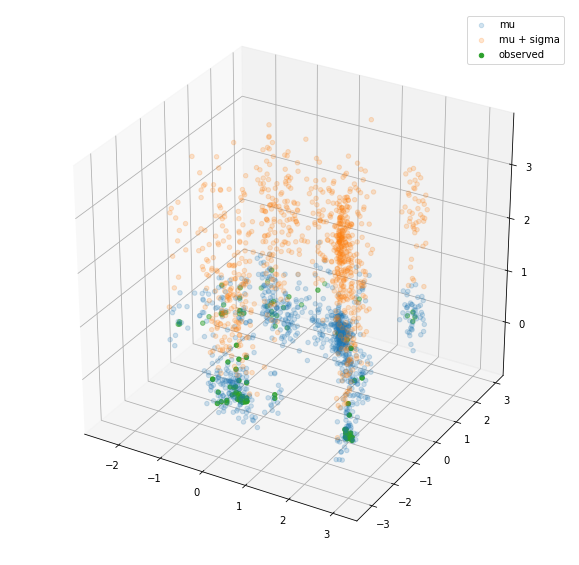

In [9]:
from mpl_toolkits import mplot3d
#%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
#X, Y = np.meshgrid(X_embedded[similar_seqs,0], X_embedded[similar_seqs,1])
#ax.plot_surface(X,Y, agent.mu[similar_seqs].reshape(len_sim,1), label = 'mu', rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.scatter3D(X_embedded[similar_seqs,0], X_embedded[similar_seqs,1], agent.mu[similar_seqs], label = 'mu', alpha = 0.2)
ax.scatter3D(X_embedded[similar_seqs,0], X_embedded[similar_seqs,1], (agent.mu + agent.sigma)[similar_seqs], label = 'mu + sigma', alpha = 0.2)
ax.scatter3D(X_embedded[:113,0], X_embedded[:113,1], list(all_data[:113,1]), label = 'observed')
plt.legend()